In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## FoodWheel: Let the Food Choose For You

FoodWheel is a startup delivery service that takes away the struggle of deciding where to eat! FoodWheel picks you an amazing local restaurant and lets you order through the app. Senior leadership is getting ready for a big board meeting, and as the resident Data Analyst, you have been enlisted to help decipher data and create a presentation to answer several key questions:

-    What cuisines does FoodWheel offer? Which areas should the company search for more restaurants to partner with?
-    How has the average order amount changed over time? What does this say about the trajectory of the company?
-    How much has each customer on FoodWheel spent over the past six months? What can this tell us about the average FoodWheel customer?


Over this project, you will analyze several DataFrames and create several visualizations to help answer these questions.

## What cuisines does FoodWheel offer?

The board wants to make sure that FoodWheel offers a wide, diverse, variety of restaurants. Having many different options makes customers more likely to come back. You’ve been provided with a CSV, restaurants.csv , which contains all of the restaurants that partner with FoodWheel.

Let’s create pie chart showing the different types of cuisines available on FoodWheel.

In [2]:
restaurants = pd.read_csv('restaurants.csv')

restaurants.head()


,id,name,neighborhood,cuisine
0,1,Jongro BBQ,Midtown,Korean
1,2,Pocha 32,Midtown,Korean
2,3,Nom Wah Tea Parlor,Chinatown,Chinese
3,4,Robertas,Brooklyn,Pizza
4,5,Speedy Romeo,Brooklyn,Pizza


In [3]:
cuisine_options_count = restaurants.cuisine.nunique()
print(cuisine_options_count)

7


In [4]:
# cuisine_counts = restaurants.name[restaurants.groupby(restaurants.cuisine)]
cuisine_counts = restaurants.groupby('cuisine').name.count().reset_index()

cuisine_counts

,cuisine,name
0,American,10
1,Chinese,11
2,Italian,8
3,Japanese,4
4,Korean,3
5,Pizza,4
6,Vegetarian,4


### What cuisines does FoodWheel offer?

In [5]:
cuisines = cuisine_counts.cuisine.values
counts = cuisine_counts.name.values


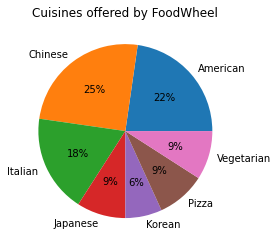

In [6]:
plt.pie(counts, labels=cuisines, autopct="%d%%")
plt.title('Cuisines offered by FoodWheel')
plt.axis()
plt.show()

### Orders over time

FoodWheel is a relatively new startup. They launched in April, and have grown more popular since then. Management suspects that the average order size has increased over time. They’d like you to investigate if this claim is true and answer these questions:

-    How has the average order amount changed over time?
-    What does this say about the trajectory of the company?

In [20]:
orders = pd.read_csv('orders.csv')
orders.head()

,id,customer_id,date,price
0,1,61,6/18/2017,13
1,2,210,5/8/2017,21
2,3,0,9/7/2017,33
3,4,66,7/7/2017,19
4,5,65,4/26/2017,13


In [21]:
orders['month'] = orders.date.apply(
    lambda date: date.split('/')[0]
    )
orders.head()

,id,customer_id,date,price,month
0,1,61,6/18/2017,13,6
1,2,210,5/8/2017,21,5
2,3,0,9/7/2017,33,9
3,4,66,7/7/2017,19,7
4,5,65,4/26/2017,13,4


In [24]:
avg_order = orders.groupby('month').price.mean().reset_index()
avg_order

,month,price
0,4,9.609195
1,5,14.773810
2,6,15.152174
3,7,18.012821
4,8,21.150685
5,9,29.505882


In [25]:
std_order = orders.groupby('month').price.std().reset_index()
std_order

,month,price
0,4,2.562504
1,5,3.323343
2,6,2.835934
3,7,2.848985
4,8,4.455556
5,9,4.518806


### Orders Over Time

In [28]:
bar_heights = avg_order.price
bar_errors = std_order.price


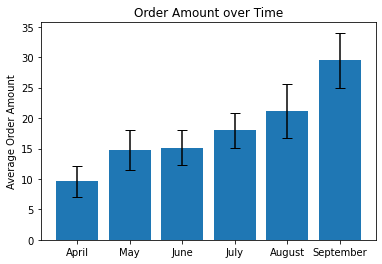

In [35]:
ax = plt.subplot()
plt.bar(range(len(bar_heights)), bar_heights, yerr= bar_errors, capsize=5)
ax.set_xticks(range(len(bar_heights)))
ax.set_xticklabels(['April', 'May', 'June', 'July', 'August', 'September'])
plt.ylabel('Average Order Amount')
plt.title('Order Amount over Time')
plt.show()

### Customer Types

There is a range of amounts that customers spend on FoodWheel. Let’s investigate and aim to answer our final question:

-    How much has each customer on FoodWheel spent over the past six months? What can this tell us about the average FoodWheel customer?


A great way to answer this question is to create a histogram of the amount spent by each customer over the past six months.

In [37]:
customer_amount = orders.groupby('customer_id').price.sum().reset_index()

In [40]:
customer_amount.head()

,customer_id,price
0,0,83
1,2,11
2,3,65
3,4,32
4,5,119


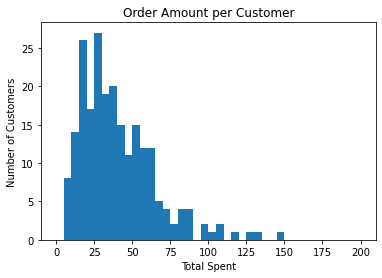

In [42]:
plt.hist(customer_amount.price.values, bins=40, range=(0,200))
plt.xlabel('Total Spent')
plt.ylabel('Number of Customers')
plt.title('Order Amount per Customer')
plt.show()